# n-Sphere $\mathbb{S}^{n}$

In [1]:
import jaxgeometry as jg

import matplotlib.pyplot as plt

from jax import vmap
import jax.numpy as jnp

2023-12-18 18:17:18.206729: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [2]:
SN = jg.manifolds.nSphere(N=2,use_spherical_coords=False, chart_center=None)

using M.Exp for Logarithm


In [3]:
x0 = SN.coords(jnp.array([0.0,0.0]))

In [4]:
SN.Log(x0, jnp.array([1.0,0.0,0.0]))

Array([0.7853982, 0.       ], dtype=float32)

In [5]:
test = SN.Exp(x0, jnp.array([0.5,0.5]))

In [6]:
test

(Array([ 1.0906298e-09, -0.0000000e+00], dtype=float32),
 Array([0.69845605, 0.69845605, 0.15594372], dtype=float32))

In [7]:
Fx = SN.F(x0)

In [8]:
SN.F(test)

Array([0.69845605, 0.69845605, 0.15594372], dtype=float32)

In [9]:
SN.dist(x0,test)

Array(1.4142134, dtype=float32)

In [10]:
SN.ParallelTransport(x0,test,jnp.ones(2)*0.5)

Array([-0.09683794, -0.09683794], dtype=float32)

In [43]:
jg.stochastics.Brownian_coords(SN)
(product,sde_product,chart_update_product) = \
    jg.stochastics.product_sde(SN, SN.sde_Brownian_coords, SN.chart_update_Brownian_coords)
from jaxgeometry.stochastics import tile

In [44]:
from jaxgeometry.integration import dts, dWs

In [45]:
N_sim = 5
x0s = tile(x0, N_sim)

_dts = dts(T=1.0, n_steps=1000)
dW = dWs(N_sim*SN.dim,_dts).reshape(-1,N_sim,SN.dim)
(ts,xss,chartss,*_) = product(x0s,
                              _dts,dW,jnp.repeat(1.,N_sim))
chartss = vmap(lambda x,y: vmap(lambda x,chart: SN.F((x,chart)))(x,y))(xss, chartss)

t = ts[jnp.arange(200,len(ts)+200, 200)]
xs = xss[jnp.arange(200,len(xss)+200, 200)]
chart = chartss[jnp.arange(200,len(chartss)+200, 200)]

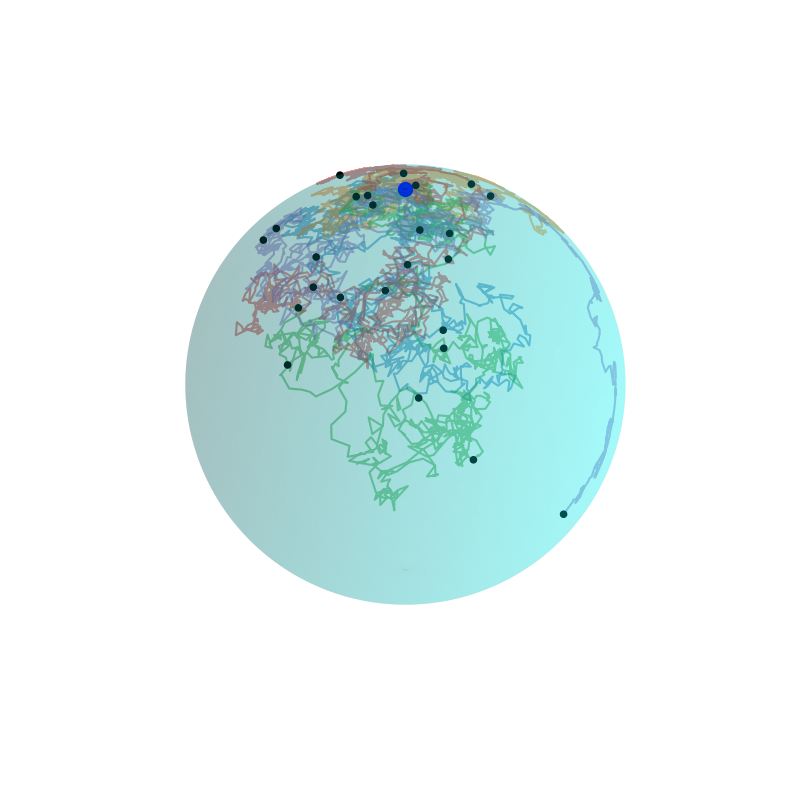

In [46]:
# Creating the theta and phi values.
intervals = 100
ntheta = intervals
nphi = 2*intervals

theta = jnp.linspace(0.0, jnp.pi*1, ntheta+1)
phi   = jnp.linspace(0.0, jnp.pi*2, nphi+1)

# Creating the coordinate grid for the unit sphere.
X1 = jnp.outer(jnp.sin(theta), jnp.cos(phi))
X2 = jnp.outer(jnp.sin(theta), jnp.sin(phi))
X3 = jnp.outer(jnp.cos(theta), jnp.ones(nphi+1))
X = jnp.transpose(jnp.concatenate((X1.reshape(1, ntheta+1, nphi+1), 
                     X2.reshape(1, ntheta+1, nphi+1), 
                     X3.reshape(1, ntheta+1, nphi+1))), axes=(1,2,0))

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, X3, rstride=1, cstride=1, color='cyan', alpha=0.2)
ax.scatter(chart[:,:,0], chart[:,:,1], chart[:,:,2], color='black', alpha=1.0)
ax.scatter(x0[1][0], x0[1][1], x0[1][2], color='blue', alpha=1.0, s=100)
for i in range(N_sim):
    ax.plot3D(chartss[:,i,0], chartss[:,i,1], chartss[:,i,2], alpha=0.5)#, color='red', alpha=0.6)
ax.set_box_aspect([1,1,1])
ax.set_xlim([-1.0,1.0])
ax.set_ylim([-1.0,1.0])
ax.set_zlim([-1.0,1.0])
ax.set_axis_off()
fig.tight_layout()

#fig.savefig('Figures/s2_samples.pdf', format='pdf', pad_inches=0.1, bbox_inches='tight')

plt.show()

In [15]:
jg.stochastics.brownian_projection(SN)

In [16]:
from jaxgeometry.integration import integrator_stratonovich
(product,sde_product,chart_update_product) = \
    jg.stochastics.product_sde(SN, SN.sde_brownian_projection, SN.chart_update_brownian_projection, integrator_stratonovich)
from jaxgeometry.stochastics import tile

In [17]:
N_sim = 5
x = (x0[1],x0[0])
x0s = tile(x, N_sim)

_dts = dts(T=1.0, n_steps=1000)
dW = dWs(N_sim*SN.emb_dim,_dts).reshape(-1,N_sim,SN.emb_dim)
(ts,chartss,xss,*_) = product(x0s,
                              _dts,dW,jnp.repeat(1.,N_sim))

t = ts[jnp.arange(200,len(ts)+200, 200)]
xs = xss[jnp.arange(200,len(xss)+200, 200)]
chart = chartss[jnp.arange(200,len(chartss)+200, 200)]

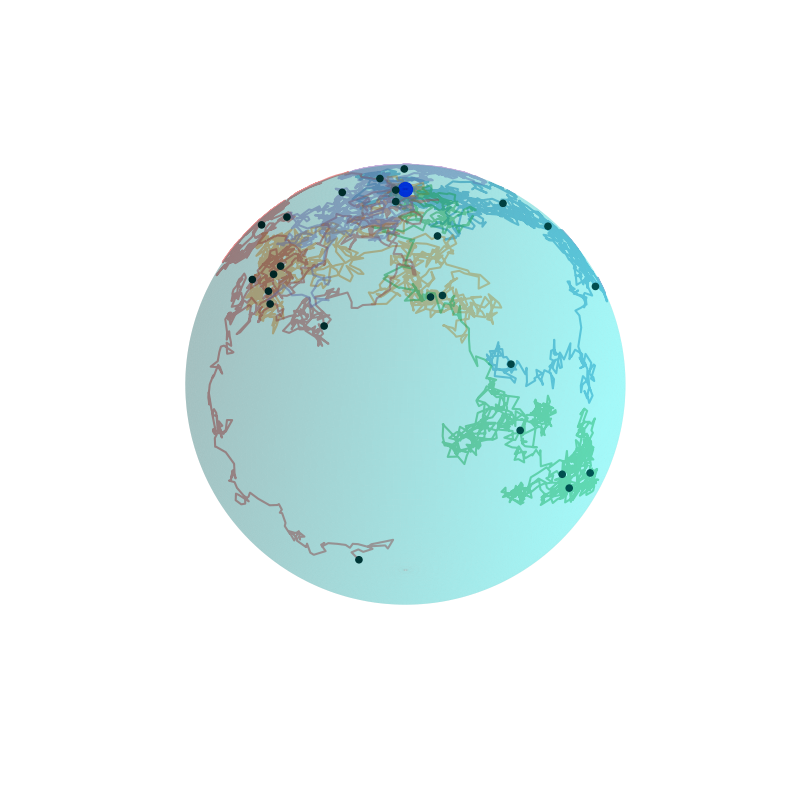

In [18]:
# Creating the theta and phi values.
intervals = 100
ntheta = intervals
nphi = 2*intervals

theta = jnp.linspace(0.0, jnp.pi*1, ntheta+1)
phi   = jnp.linspace(0.0, jnp.pi*2, nphi+1)

# Creating the coordinate grid for the unit sphere.
X1 = jnp.outer(jnp.sin(theta), jnp.cos(phi))
X2 = jnp.outer(jnp.sin(theta), jnp.sin(phi))
X3 = jnp.outer(jnp.cos(theta), jnp.ones(nphi+1))
X = jnp.transpose(jnp.concatenate((X1.reshape(1, ntheta+1, nphi+1), 
                     X2.reshape(1, ntheta+1, nphi+1), 
                     X3.reshape(1, ntheta+1, nphi+1))), axes=(1,2,0))

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, X3, rstride=1, cstride=1, color='cyan', alpha=0.2)
ax.scatter(chart[:,:,0], chart[:,:,1], chart[:,:,2], color='black', alpha=1.0)
ax.scatter(x0[1][0], x0[1][1], x0[1][2], color='blue', alpha=1.0, s=100)
for i in range(N_sim):
    ax.plot3D(chartss[:,i,0], chartss[:,i,1], chartss[:,i,2], alpha=0.5)#, color='red', alpha=0.6)
ax.set_box_aspect([1,1,1])
ax.set_xlim([-1.0,1.0])
ax.set_ylim([-1.0,1.0])
ax.set_zlim([-1.0,1.0])
ax.set_axis_off()
fig.tight_layout()

#fig.savefig('Figures/s2_samples.pdf', format='pdf', pad_inches=0.1, bbox_inches='tight')

plt.show()

In [19]:
vmap(lambda v: SN.proj(x0[1], v))(jnp.eye(3))

Array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.]], dtype=float32)

In [20]:
test = SN.sde_brownian_projection((0.,x0[1],x0[0],1.), (0.01,0.01*jnp.ones(3)))

In [65]:
test = SN.Exp(x0, jnp.array([10.0,10.0]))

In [66]:
test

(Array([ 5.8200167e-11, -0.0000000e+00], dtype=float32),
 Array([-0.00702666, -0.00702666, -0.99995065], dtype=float32))

In [67]:
test2 = SN.centered_chart(test[1])

In [68]:
SN.invF((test[1],test2)), test2

(Array([ 5.8200167e-11, -0.0000000e+00], dtype=float32),
 Array([-0.00702666, -0.00702666, -0.99995065], dtype=float32))

In [23]:
test2 = SN.sde_brownian_projection((0.01,x0[1]+test[1],x0[0],1.), (0.01,0.01*jnp.ones(3)))

In [24]:
test2

(Array([0., 0., 0.], dtype=float32),
 Array([ 0.009898,  0.009898, -0.0002  ], dtype=float32),
 Array([[ 9.999e-01, -1.000e-04, -1.000e-02],
        [-1.000e-04,  9.999e-01, -1.000e-02],
        [-1.000e-02, -1.000e-02,  0.000e+00]], dtype=float32),
 0.0)

In [25]:
x0[1]+.5*(test[1]+test2[1])

Array([0.009949, 0.009949, 0.9999  ], dtype=float32)

In [26]:
from jaxgeometry.integration import integrator_ito
jg.stochastics.GRW(SN, f_fun = lambda x,v: SN.ExpEmbedded(x[0], v))
(product,sde_product,chart_update_product) = \
    jg.stochastics.product_sde(SN, SN.sde_grw, SN.chart_update_grw,
                              lambda a,b: integrator_ito(a,b,lambda x,v: vmap(lambda x,y,v: SN.ExpEmbedded(x,v))(x[0],x[1],v)))
from jaxgeometry.stochastics import tile

In [27]:
from jaxgeometry.integration import dts, dWs

In [39]:
N_sim = 5
x = (x0[1],x0[0])
x0s = tile(x, N_sim)

_dts = dts(T=1.0, n_steps=1000)
dW = dWs(N_sim*SN.emb_dim,_dts).reshape(-1,N_sim,SN.emb_dim)
(ts,chartss,xss,*_) = product(x0s,
                              _dts,dW,jnp.repeat(1.,N_sim))

t = ts[jnp.arange(200,len(ts)+200, 200)]
xs = xss[jnp.arange(200,len(xss)+200, 200)]
chart = chartss[jnp.arange(200,len(chartss)+200, 200)]

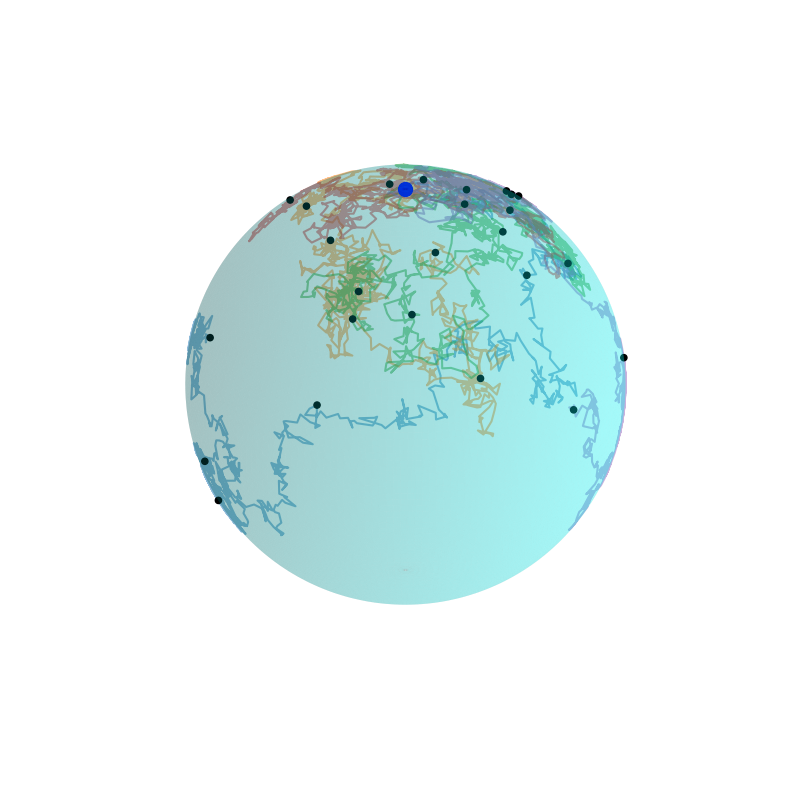

In [40]:
# Creating the theta and phi values.
intervals = 100
ntheta = intervals
nphi = 2*intervals

theta = jnp.linspace(0.0, jnp.pi*1, ntheta+1)
phi   = jnp.linspace(0.0, jnp.pi*2, nphi+1)

# Creating the coordinate grid for the unit sphere.
X1 = jnp.outer(jnp.sin(theta), jnp.cos(phi))
X2 = jnp.outer(jnp.sin(theta), jnp.sin(phi))
X3 = jnp.outer(jnp.cos(theta), jnp.ones(nphi+1))
X = jnp.transpose(jnp.concatenate((X1.reshape(1, ntheta+1, nphi+1), 
                     X2.reshape(1, ntheta+1, nphi+1), 
                     X3.reshape(1, ntheta+1, nphi+1))), axes=(1,2,0))

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, X3, rstride=1, cstride=1, color='cyan', alpha=0.2)
ax.scatter(chart[:,:,0], chart[:,:,1], chart[:,:,2], color='black', alpha=1.0)
ax.scatter(x0[1][0], x0[1][1], x0[1][2], color='blue', alpha=1.0, s=100)
for i in range(N_sim):
    ax.plot3D(chartss[:,i,0], chartss[:,i,1], chartss[:,i,2], alpha=0.5)#, color='red', alpha=0.6)
ax.set_box_aspect([1,1,1])
ax.set_xlim([-1.0,1.0])
ax.set_ylim([-1.0,1.0])
ax.set_zlim([-1.0,1.0])
ax.set_axis_off()
fig.tight_layout()

#fig.savefig('Figures/s2_samples.pdf', format='pdf', pad_inches=0.1, bbox_inches='tight')

plt.show()

In [30]:
test = SN.sde_grw((0.01, x0[1],x0[0], 1.), (0.01, 0.001*jnp.ones(3)))

In [31]:
SN.random_walk((x0[1],x0[0]), _dts, dW[:,0,:])[1]

Array([[ 0.0162679 ,  0.05006419,  0.9986135 ],
       [ 0.04357053,  0.06743126,  0.99677205],
       [ 0.09941588,  0.04962839,  0.9938075 ],
       ...,
       [-0.22928989, -0.9403668 , -0.2512704 ],
       [-0.239843  , -0.9266335 , -0.28952736],
       [-0.23585801, -0.9364405 , -0.25971237]], dtype=float32)

In [32]:
SN.invJF((x0[1],x0[1]))

Array([[0.5, 0. , 0. ],
       [0. , 0.5, 0. ]], dtype=float32)

In [33]:
x0[1]

Array([0., 0., 1.], dtype=float32)

In [34]:
normv = jnp.linalg.norm(test[1])

In [35]:
test[1]*jnp.sin(normv)/normv

Array([0.001, 0.001, 0.   ], dtype=float32)

In [36]:
jnp.cos(x0[1])*x0[1]+test[1]*jnp.sin(normv)/normv

Array([0.001    , 0.001    , 0.5403023], dtype=float32)

In [37]:
SN.ExpEmbedded(x0[1], test[1])

Array([0.001   , 0.001   , 0.999999], dtype=float32)

In [38]:
test

(Array([0., 0., 0.], dtype=float32),
 Array([0.001, 0.001, 0.   ], dtype=float32),
 Array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], dtype=float32),
 0.0)